In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime as dt
import squarify
%matplotlib inline

In [2]:
data=pd.read_excel(r"C:\Users\hp\OneDrive\Desktop\ml\Online Retail.xlsx")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


<AxesSubplot:>

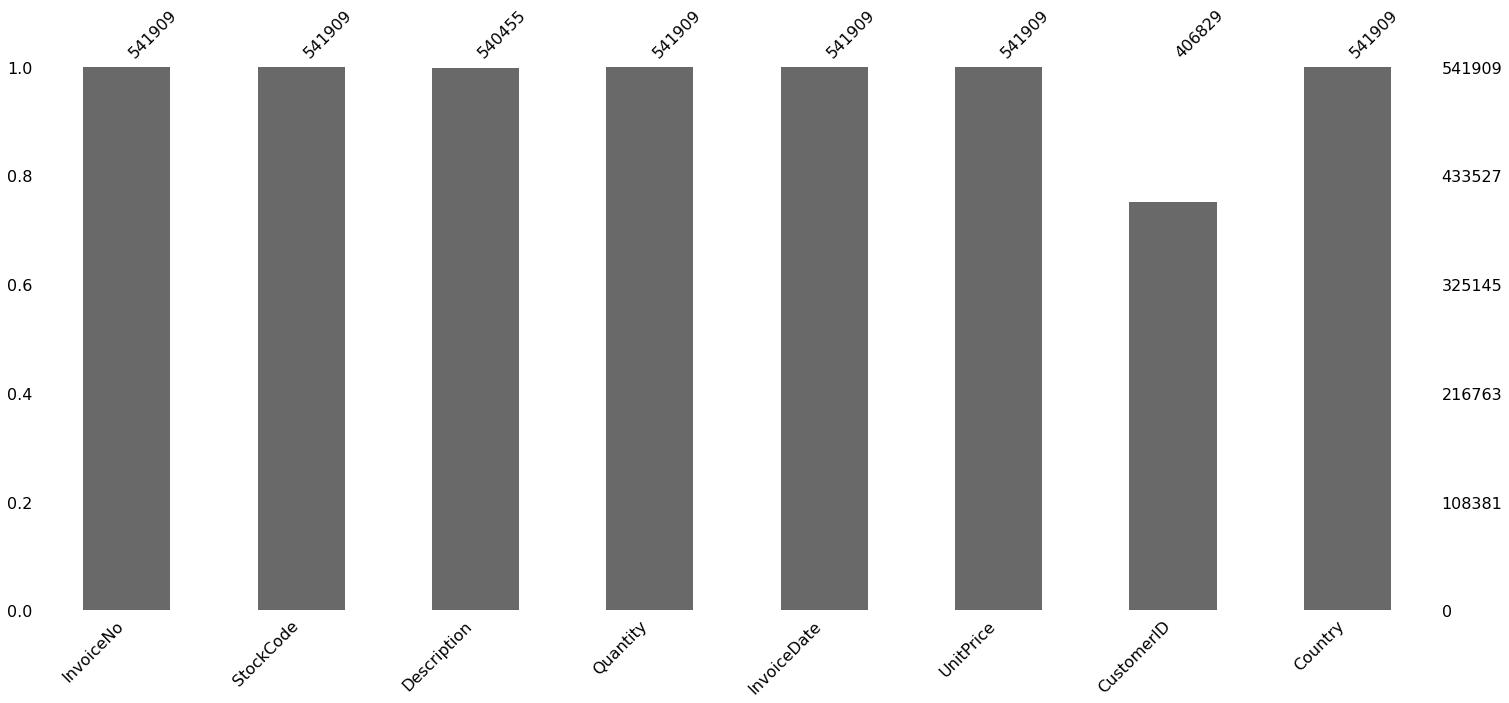

In [6]:
msno.bar(data)

In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
data[data['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [10]:
data.drop(data[data['Quantity']<0].index,inplace=True)

In [11]:
data[data['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [12]:
data.drop(data[data['UnitPrice']<0].index,inplace=True)

In [13]:
data.shape

(397924, 8)

In [14]:
duplicate = data[data.duplicated('InvoiceNo')] 
duplicate

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [15]:
gb =data.groupby('Country').Quantity.max()
gb

Country
Australia                1152
Austria                   288
Bahrain                    96
Belgium                   272
Brazil                     24
Canada                    504
Channel Islands           407
Cyprus                    288
Czech Republic             72
Denmark                   256
EIRE                     1440
European Community         24
Finland                   144
France                    912
Germany                   600
Greece                     48
Iceland                   240
Israel                    100
Italy                     200
Japan                    2040
Lebanon                    24
Lithuania                  48
Malta                      48
Netherlands              2400
Norway                    240
Poland                     72
Portugal                  120
RSA                        12
Saudi Arabia               12
Singapore                 288
Spain                     360
Sweden                    768
Switzerland               288
US

In [16]:
numerical_variables = [feature for feature in data.columns if (data[feature].dtypes != 'O' and data[feature].dtypes !='<M8[ns]')]
numerical_variables


['Quantity', 'UnitPrice', 'CustomerID']

In [17]:
data['YearOfSale'] = pd.DatetimeIndex(data['InvoiceDate']).year
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearOfSale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011


<AxesSubplot:xlabel='Country'>

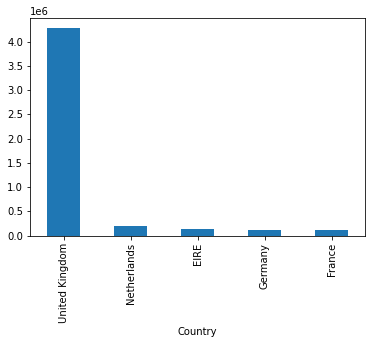

In [18]:
data.groupby(['Country'])['Quantity'].sum().sort_values(ascending=False)[:5].plot(kind='bar')

<AxesSubplot:xlabel='YearOfSale'>

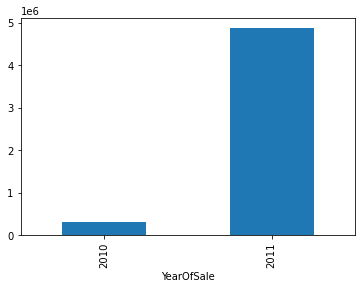

In [19]:
data.groupby(['YearOfSale'])['Quantity'].sum().plot(kind='bar')

In [20]:
data['Price'] = data['Quantity'] * data['UnitPrice']

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   YearOfSale   397924 non-null  int64         
 9   Price        397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 41.5+ MB


In [22]:
Now = dt.datetime(2011,12,10)
Now

datetime.datetime(2011, 12, 10, 0, 0)

In [23]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])
data['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 397924, dtype: datetime64[ns]

In [24]:
rfmTable = data.groupby('CustomerID').agg({'InvoiceDate' : lambda x :(Now - x.max()).days,
                                         'InvoiceNo' : lambda x :len(x),'Price' : lambda x :sum(x) })

In [25]:
rfmTable.rename(columns ={'InvoiceDate' : 'Recency', 'InvoiceNo' :'Frequency',
                          'Price':'Monetary_Value'},inplace = True)

In [26]:
rfmTable.head()

,Recency,Frequency,Monetary_Value
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


In [27]:
rfmTable.shape

(4339, 3)

In [28]:
r_labels = range(4,0,-1)
f_labels = range(1,5)
m_labels = range(1,5)

r_groups = pd.qcut(rfmTable['Recency'],4,r_labels)

f_groups = pd.qcut(rfmTable['Frequency'],4,f_labels)

m_groups = pd.qcut(rfmTable['Monetary_Value'],4,m_labels)

rfmTable = rfmTable.assign(R=r_groups,F=f_groups,M=m_groups)

rfmTable.head()

rfmTable.info()

rfmTable.dtypes

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4339 entries, 12346.0 to 18287.0
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Recency         4339 non-null   int64   
 1   Frequency       4339 non-null   int64   
 2   Monetary_Value  4339 non-null   float64 
 3   R               4339 non-null   category
 4   F               4339 non-null   category
 5   M               4339 non-null   category
dtypes: category(3), float64(1), int64(2)
memory usage: 148.7 KB


Recency              int64
Frequency            int64
Monetary_Value     float64
R                 category
F                 category
M                 category
dtype: object

In [29]:
rfmTable['R'] = rfmTable['R'].astype(str)
rfmTable['F'] = rfmTable['F'].astype(str)
rfmTable['M'] = rfmTable['M'].astype(str)

In [30]:
rfmTable['RFM_Segment'] = rfmTable['R'].map(str) + rfmTable['F'].map(str) + rfmTable['M'].map(str)

rfmTable.head()

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Segment
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,4,114
12347.0,2,182,4310.00,4,4,4,444
12348.0,75,31,1797.24,2,2,4,224
12349.0,18,73,1757.55,3,3,4,334
12350.0,310,17,334.40,1,1,2,112


In [31]:
rfm_segment = rfmTable.groupby('RFM_Segment')['RFM_Segment']



print('The Number of Unique Segment is - ',rfm_segment.nunique().sum())
print('***********************************')
print(rfm_segment.unique())
print('***********************************')

The Number of Unique Segment is -  61
***********************************
RFM_Segment
111    [111]
112    [112]
113    [113]
114    [114]
121    [121]
       ...  
434    [434]
441    [441]
442    [442]
443    [443]
444    [444]
Name: RFM_Segment, Length: 61, dtype: object
***********************************


In [32]:
rfmTable['R'] = rfmTable['R'].astype(int)
rfmTable['F'] = rfmTable['F'].astype(int)
rfmTable['M'] = rfmTable['M'].astype(int)

In [33]:
rfmTable['RFM_Score'] = rfmTable[['R','F','M']].sum(axis=1)

In [34]:
rfmTable

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,325,1,77183.60,1,1,4,114,6
12347.0,2,182,4310.00,4,4,4,444,12
12348.0,75,31,1797.24,2,2,4,224,8
12349.0,18,73,1757.55,3,3,4,334,10
12350.0,310,17,334.40,1,1,2,112,4
...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,1,1,1,111,3
18281.0,180,7,80.82,1,1,1,111,3
18282.0,7,12,178.05,4,1,1,411,6


In [35]:
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
rfmTable['RFM_Level'] = rfmTable.apply(rfm_level, axis=1)

rfmTable.head()


,Recency,Frequency,Monetary_Value,R,F,M,RFM_Segment,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,1,1,4,114,6,Potential
12347.0,2,182,4310.00,4,4,4,444,12,Can't Loose Them
12348.0,75,31,1797.24,2,2,4,224,8,Champions
12349.0,18,73,1757.55,3,3,4,334,10,Can't Loose Them
12350.0,310,17,334.40,1,1,2,112,4,Needs Attention


In [36]:
rfm_level_agg = rfmTable.groupby('RFM_Level').agg({'Recency' :'mean',
                                       'Frequency':'mean',
                                       'Monetary_Value':['mean','count']}).round(1)

In [37]:
rfm_level_agg

Recency Frequency Monetary_Value      
                      mean      mean           mean count
RFM_Level                                                
Can't Loose Them      25.9     192.0         4406.5  1676
Champions             63.7      57.0          994.1   459
Loyal                 79.3      38.7          760.4   452
Needs Attention      174.5      13.7          239.2   386
Potential             95.5      28.0          822.0   465
Promising            153.3      21.4          368.7   517
Require Activation   260.3       8.2          158.9   384

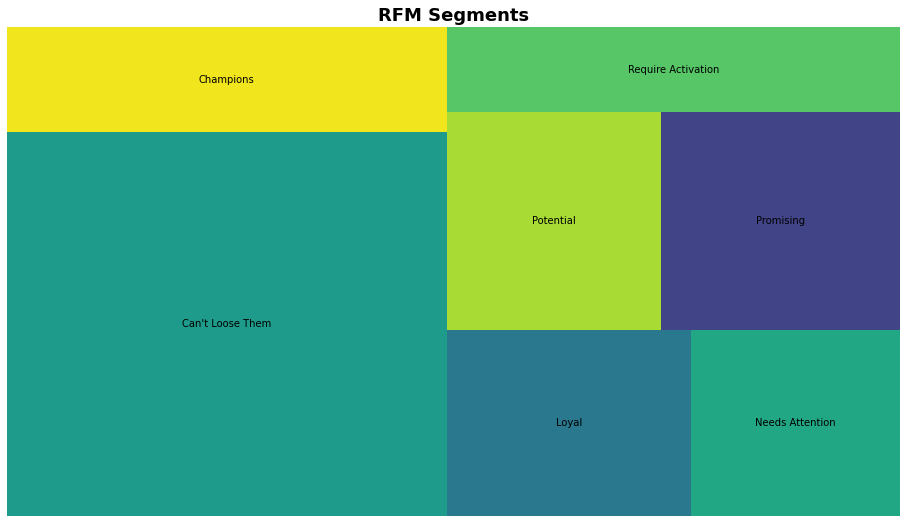

In [38]:
#rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=["Can't Loose Them",
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=1)
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

In [39]:
rfm_rfm = rfmTable[['Recency','Frequency','Monetary_Value']]
print(rfm_rfm.describe())

           Recency    Frequency  Monetary_Value
count  4339.000000  4339.000000     4339.000000
mean     92.041484    91.708689     2053.793018
std     100.007757   228.792852     8988.248381
min       0.000000     1.000000        0.000000
25%      17.000000    17.000000      307.245000
50%      50.000000    41.000000      674.450000
75%     141.500000   100.000000     1661.640000
max     373.000000  7847.000000   280206.020000


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

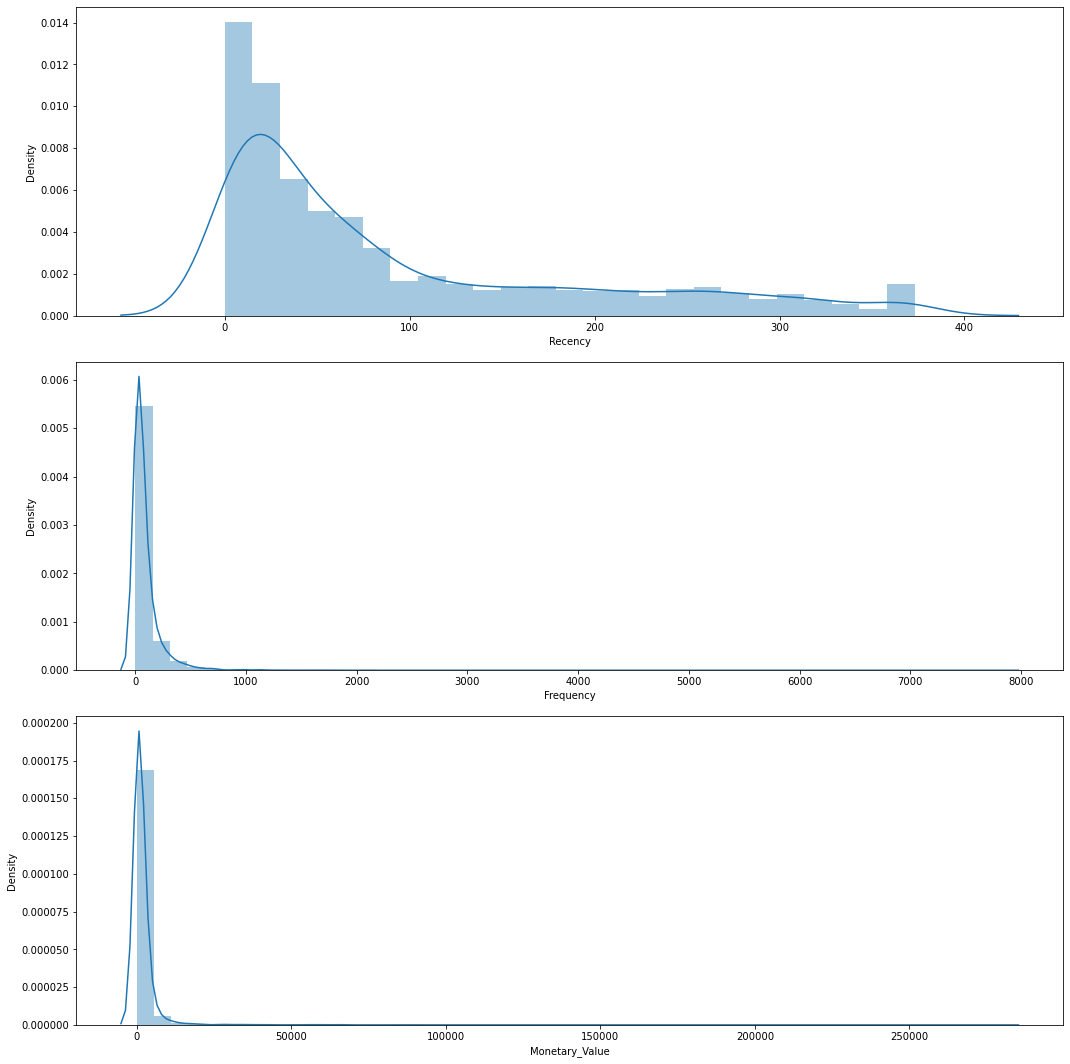

In [40]:
# plot the distribution of RFM values
f,ax = plt.subplots(figsize=(15, 15))
plt.subplot(3, 1, 1); sns.distplot(rfmTable.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfmTable.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfmTable.Monetary_Value, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

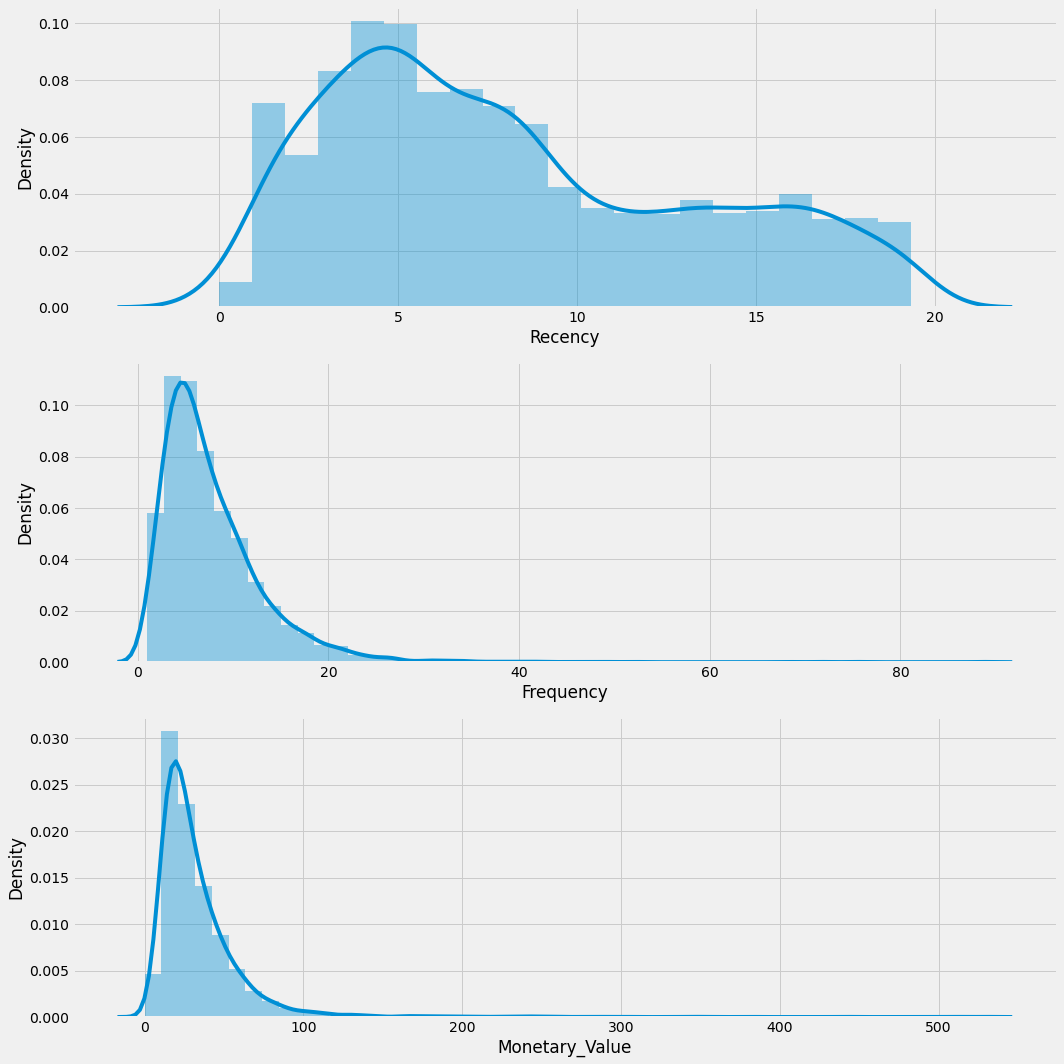

In [41]:
rfm_sqrt = rfmTable[['Recency', 'Frequency', 'Monetary_Value']].apply(np.sqrt, axis = 1).round(3)


f,ax = plt.subplots(figsize=(15, 15))
plt.subplot(3, 1, 1); sns.distplot(rfm_sqrt.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm_sqrt.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm_sqrt.Monetary_Value, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

In [42]:
rfm_sqrt.skew()

Recency           0.568573
Frequency         3.222854
Monetary_Value    5.886431
dtype: float64

In [43]:
from sklearn.preprocessing import StandardScaler  

In [44]:
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_sqrt)
rfm_normalized.shape

(4339, 3)

In [45]:
from sklearn.cluster import KMeans 


In [46]:
inertia = []
kr = range(1,8)
for k in kr:
    km = KMeans(n_clusters = k,random_state=1)
    km.fit(rfm_normalized)
    inertia.append(km.inertia_)
print (inertia)

[13017.00000000002, 8260.687725380905, 5674.489506863121, 4219.20744856546, 3491.5122954461463, 3114.5705508649944, 2765.940592707383]


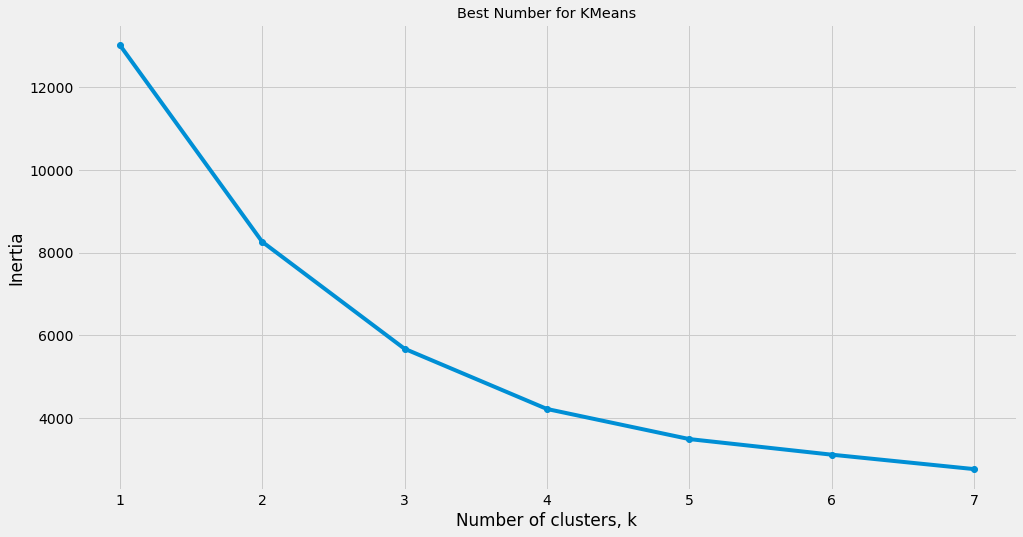

In [47]:
ks = range(1,8)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k,random_state=1)
    kc.fit(rfm_normalized)
    inertias.append(kc.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('Best Number for KMeans')
plt.show()

In [48]:
# clustering
kc = KMeans(n_clusters=3,random_state=1)
kc.fit(rfm_normalized)

KMeans(n_clusters=3, random_state=1)

In [49]:
# Assign the clusters to datamart
rfmTable['K_Cluster'] = kc.labels_
rfmTable.head()

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Segment,RFM_Score,RFM_Level,K_Cluster
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,1,1,4,114,6,Potential,1
12347.0,2,182,4310.00,4,4,4,444,12,Can't Loose Them,1
12348.0,75,31,1797.24,2,2,4,224,8,Champions,0
12349.0,18,73,1757.55,3,3,4,334,10,Can't Loose Them,0
12350.0,310,17,334.40,1,1,2,112,4,Needs Attention,2


[]

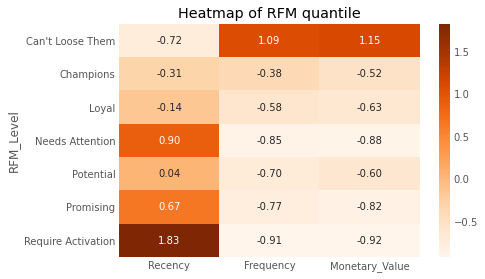

In [50]:
# the mean value in total 
total_avg = rfmTable.iloc[:, 0:3].mean()
total_avg
# calculate the proportional gap with total mean
cluster_avg = rfmTable.groupby('RFM_Level').mean().iloc[:, 0:3]
prop_rfm = cluster_avg/total_avg - 1
# heatmap with RFM
sns.heatmap(prop_rfm, cmap= 'Oranges', fmt= '.2f', annot = True)
plt.title('Heatmap of RFM quantile')
plt.plot()

[]

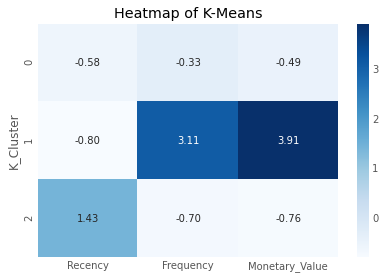

In [51]:
# calculate the proportional gap with total mean
cluster_avg_K = rfmTable.groupby('K_Cluster').mean().iloc[:, 0:3]
prop_rfm_K = cluster_avg_K/total_avg - 1
# heatmap with K-means
sns.heatmap(prop_rfm_K, cmap= 'Blues', fmt= '.2f', annot = True)
plt.title('Heatmap of K-Means')
plt.plot()